# ETOF Example
This is a circuit that incorporates the so-called "ETOF" gate, a generalized form of the Toffoli gate that allows for inverted and/or ignored inputs.

Runs the circuit on both the simulator and IBMQ.

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.gate import Gate
from typing import List, Optional

from lib.etof import etof
from lib.qc_extensions import get_ibm_backend
from lib.ql_matrices import Bases

{'1010': 1024}


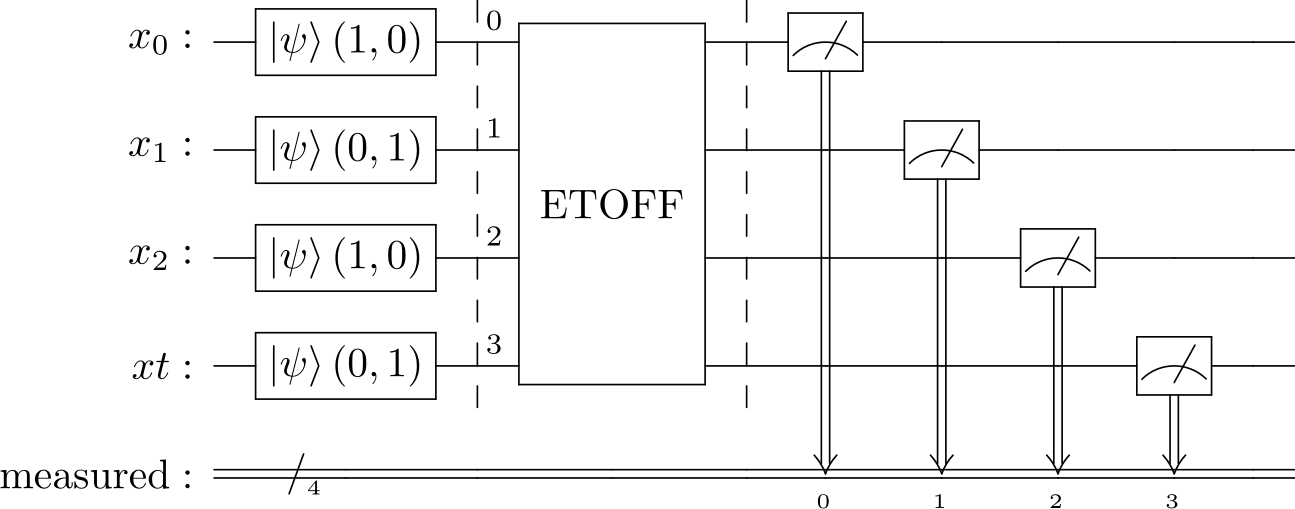

In [3]:
class Test(QuantumCircuit):
    def __init__(self, controls: List[Optional[bool]], initial_control_states: List[int]):
        n = len(controls)

        if n != len(initial_control_states):
            raise ValueError("n != len(initial_control_states)")

        controllers = QuantumRegister(n, "x")
        target = QuantumRegister(1, "xt")
        measured = ClassicalRegister(n + 1, "measured")
        super().__init__(controllers, target, measured)

        for qubit, bra in enumerate(initial_control_states):
            if bra == 0:
                self.initialize(Bases.bras.zero, qubit)
            else:
                self.initialize(Bases.bras.one, qubit)
        self.initialize(Bases.bras.one, n)

        self.barrier()

        self.append(etof(controls), [*range(0, n + 1)])

        self.barrier()

        for qubit in range(n):
            self.measure(qubit, qubit)
        self.measure(n, n)


test = Test([True, False, None], [0, 1, 0])
results = test.simulate()
print(results.get_counts())
test.visualize()

In [ ]:
backend = get_ibm_backend(4)
results = test.run(backend)
print(results.get_counts())

ibmqfactory.load_account:WARNING:2022-11-27 19:39:38,329: Credentials are already in use. The existing account in the session will be replaced.


Least busy backend: ibm_oslo
Job Status: job has successfully run
{'0000': 30, '0001': 6, '0010': 272, '0011': 34, '0110': 11, '0111': 2, '1000': 172, '1001': 23, '1010': 3312, '1011': 91, '1100': 3, '1101': 1, '1110': 42, '1111': 1}
